# Lecture 17 Dimension Reduction
This notebook will cover how high dimensional data from intracellular metabolite concentrations can be reduced to lower dimensions using PCA, LDA, and t-SNE.

### Set up imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

### Load data

In [2]:
# load the rhodococcus intracellar metabolite dataset
rhodo_df = pd.read_csv('data/rhodo_data.csv')

rhodo_df

,sample,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,...,Maltotriose,Melibiose,O-phospho-L-serine,PhlorobenzoPHEnone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose,Unknown - Carbohydrate 001,Unknown - Carbohydrate 002
0,SG_1,3.615204e+05,158448.34340,322605.073300,6.771950e+05,710902.5555,21587.08363,1742924.769,2187317.706,73643.82800,...,197109.09810,154515.48230,912327.96570,54886.78433,53255.60385,1.567848e+06,79592.74450,41592.877790,106902.772700,178790.735700
1,SG_2,2.273096e+05,213583.36610,312837.429400,5.758221e+05,510742.4749,30589.63167,1362157.065,2078919.836,85094.11759,...,132211.94520,178537.38880,546466.68580,13966.87377,54527.47672,9.428716e+05,101591.31180,125701.005500,92505.279630,61108.725740
2,SG_3,3.980749e+05,211939.49670,296180.631000,8.199962e+05,618736.8906,43765.31576,1604466.573,2008970.447,110175.16010,...,130384.73450,92173.05823,656821.37520,26902.58320,56933.25213,1.269754e+06,74901.17809,93064.523230,130229.341300,70565.038360
3,GLC_1,3.071484e+05,67093.51243,688993.874800,7.896841e+04,454156.4570,49204.36451,1682083.443,1673533.919,260517.75720,...,91569.05481,73835.03454,144954.93120,24396.52207,80936.68966,1.503872e+06,76117.45934,73153.623310,33556.786250,93378.791060
4,GLC_2,5.243990e+05,92799.06573,846794.369400,2.724752e+05,429740.5506,54159.88575,1807988.441,1892648.079,289564.42380,...,88155.78074,89790.55155,180957.49260,21501.92932,57578.22687,1.347206e+06,92921.82743,102860.222400,17502.190770,94526.402150
5,GLC_3,2.750793e+05,91128.01027,541526.933000,8.573456e+04,392350.9899,55007.71791,1366642.368,2027582.822,228498.81640,...,41202.29249,36081.98794,108310.73210,18244.73367,41068.82030,1.075354e+06,69859.45158,54034.737470,38779.884860,22869.021230
6,PHE_1,2.040576e+06,62117.76873,29381.113820,9.267515e+05,488827.4470,17656.03153,1913257.209,1640787.714,139057.66300,...,38837.83117,98097.36541,125287.66010,27897.99963,68897.32167,1.897504e+06,46513.83213,49661.397290,35115.049840,42814.000000
7,PHE_2,1.720015e+06,39870.09676,16093.138450,5.679310e+05,379245.5165,34278.42471,1657865.525,1595261.253,0.00000,...,35347.05463,72820.82375,113649.50930,21830.58759,59804.93927,1.686061e+06,44079.80613,27107.000000,35295.414120,39200.659430
8,PHE_3,1.587765e+06,46410.23775,9265.648055,5.389106e+05,351121.7984,46926.60926,1437947.627,1592373.937,79803.27844,...,29388.86864,52348.61379,97472.97772,15882.12886,98038.05559,1.505561e+06,30046.62089,9039.363119,9387.535849,1790.613584
9,GLC/PHE_1,5.320456e+06,75728.42913,84282.478150,2.699785e+05,534609.9798,54335.89125,2219697.781,1831849.039,235961.82360,...,118438.37920,119288.08970,334427.23700,45598.67413,48014.39780,1.664952e+06,68660.57585,64619.099360,62026.678030,87521.044140


### Preprocess the data using the standard scaler

In [5]:
# isolate the sample labels
labels = rhodo_df['sample']

# drop the sample column
rhodo_df = rhodo_df.drop('sample', axis=1)

rhodo_df.head()


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,...,Maltotriose,Melibiose,O-phospho-L-serine,PhlorobenzoPHEnone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose,Unknown - Carbohydrate 001,Unknown - Carbohydrate 002
0,361520.3973,158448.34340,322605.0733,677195.04810,710902.5555,21587.08363,1742924.769,2187317.706,73643.82800,317216.4194,...,197109.09810,154515.48230,912327.9657,54886.78433,53255.60385,1.567848e+06,79592.74450,41592.87779,106902.77270,178790.73570
1,227309.5576,213583.36610,312837.4294,575822.10640,510742.4749,30589.63167,1362157.065,2078919.836,85094.11759,336929.7630,...,132211.94520,178537.38880,546466.6858,13966.87377,54527.47672,9.428716e+05,101591.31180,125701.00550,92505.27963,61108.72574
2,398074.8856,211939.49670,296180.6310,819996.23120,618736.8906,43765.31576,1604466.573,2008970.447,110175.16010,515591.8300,...,130384.73450,92173.05823,656821.3752,26902.58320,56933.25213,1.269754e+06,74901.17809,93064.52323,130229.34130,70565.03836
3,307148.4264,67093.51243,688993.8748,78968.41042,454156.4570,49204.36451,1682083.443,1673533.919,260517.75720,195437.2737,...,91569.05481,73835.03454,144954.9312,24396.52207,80936.68966,1.503872e+06,76117.45934,73153.62331,33556.78625,93378.79106
4,524399.0083,92799.06573,846794.3694,272475.19930,429740.5506,54159.88575,1807988.441,1892648.079,289564.42380,260805.1545,...,88155.78074,89790.55155,180957.4926,21501.92932,57578.22687,1.347206e+06,92921.82743,102860.22240,17502.19077,94526.40215


In [8]:
# standardize the data using the StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(rhodo_df)

scaled_data


array([[-0.87621074, -0.20197304,  0.20664732, ..., -0.67650501,
        -0.08231654,  1.68116006],
       [-0.89321871,  0.18515493,  0.16316694, ...,  0.47405885,
        -0.20615757, -0.50091226],
       [-0.87157834,  0.17361258,  0.0890197 , ...,  0.02760548,
         0.11832856, -0.32557231],
       ...,
       [ 0.99942749,  1.60318897, -0.01972194, ...,  0.33462658,
         0.96498144, -0.02406692],
       [ 1.4670534 ,  1.5972777 ,  0.02721908, ..., -1.2454781 ,
         1.79887184,  0.98375957],
       [ 1.23381305,  2.33134609,  0.07721695, ...,  3.22289958,
         2.04451817, -0.15678691]])

### Run PCA

In [9]:
# define and run PCA
pca = PCA(n_components=2, random_state=42)

pca_data = pca.fit_transform(scaled_data)

pca_data


array([[ 1.62640676,  6.12372537],
       [ 0.41642428,  5.37944428],
       [ 0.60328629,  6.67328715],
       [-7.71843435,  2.5214687 ],
       [-7.744082  ,  3.40957223],
       [-7.17940952,  0.7755563 ],
       [-3.73011488, -5.16425255],
       [-3.97254985, -4.9768678 ],
       [-4.36193785, -5.5111351 ],
       [-2.59753107, -0.99254859],
       [-2.67015278, -2.53107665],
       [-2.34705217, -0.27313232],
       [ 6.99237659, -3.49859706],
       [ 7.68902632, -3.61094291],
       [ 4.97538172, -3.62406669],
       [ 4.32328768,  2.85150225],
       [ 8.60751904,  1.8012324 ],
       [ 7.0875558 ,  0.64683101]])

In [11]:
# convert the PCA results to a dataframe
pca_df = pd.DataFrame(data=pca_data, columns=['PC 1', 'PC 2'])

pca_df


,PC 1,PC 2
0,1.626407,6.123725
1,0.416424,5.379444
2,0.603286,6.673287
3,-7.718434,2.521469
4,-7.744082,3.409572
5,-7.179410,0.775556
6,-3.730115,-5.164253
7,-3.972550,-4.976868
8,-4.361938,-5.511135
9,-2.597531,-0.992549


In [12]:
# add the sample labels back to the dataframe
pca_df['sample'] = labels

pca_df

,PC 1,PC 2,sample
0,1.626407,6.123725,SG_1
1,0.416424,5.379444,SG_2
2,0.603286,6.673287,SG_3
3,-7.718434,2.521469,GLC_1
4,-7.744082,3.409572,GLC_2
5,-7.179410,0.775556,GLC_3
6,-3.730115,-5.164253,PHE_1
7,-3.972550,-4.976868,PHE_2
8,-4.361938,-5.511135,PHE_3
9,-2.597531,-0.992549,GLC/PHE_1


In [14]:
# find the explained variance of the axes
variances = pca.explained_variance_ratio_

pc1_var = variances[0]
pc2_var = variances[1]

print(pc1_var)
print(pc2_var)

0.33472932403677874
0.17379841284557898


Text(0, 0.5, 'PC 2 (17.38%)')

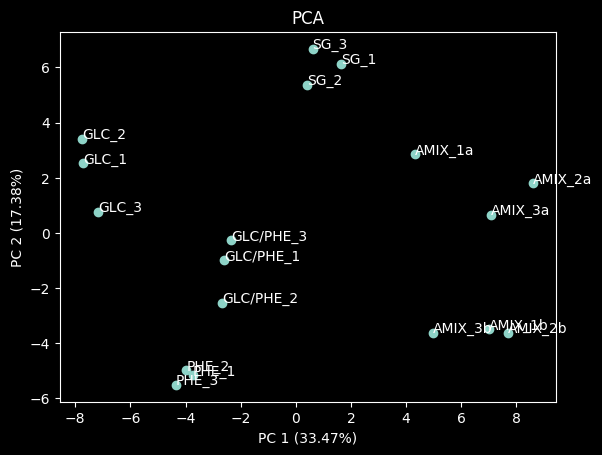

In [20]:
# plot the PCA results
plt.scatter(pca_df['PC 1'], pca_df['PC 2'])

# add labels to plot
for i, label in enumerate(pca_df['sample']):
    plt.annotate(label, (pca_df['PC 1'][i], pca_df['PC 2'][i]))

plt.title('PCA')
plt.xlabel(f'PC 1 ({pc1_var:.2%})')
plt.ylabel(f'PC 2 ({pc2_var:.2%})')

In [ ]:
# Make a dataframe of the loading scores


In [ ]:
# plot a bar chart of the metabolites with the top 10 loading scores


### Run LDA

In [22]:
# write a function to convert a label to group name
def label_to_group(label):
    label_parts = label.split('_')

    return label_parts[0]

label_to_group('GLC_2')

'GLC'

In [25]:
# use list comprehension to convert the labels to group names
group_names = [label_to_group(label) for label in labels]

group_names

['SG',
 'SG',
 'SG',
 'GLC',
 'GLC',
 'GLC',
 'PHE',
 'PHE',
 'PHE',
 'GLC/PHE',
 'GLC/PHE',
 'GLC/PHE',
 'AMIX',
 'AMIX',
 'AMIX',
 'AMIX',
 'AMIX',
 'AMIX']

In [26]:
# define and run LDA
lda = LDA(n_components=2)

lda_output = lda.fit_transform(scaled_data, group_names)

lda_output

array([[-2.31033348e-02, -3.15049067e+00],
       [ 1.08329533e+00, -1.70472969e+00],
       [ 1.50571239e+00, -3.01406075e+00],
       [ 8.24786170e+00, -1.05436672e+00],
       [ 9.03118212e+00, -2.42292002e+00],
       [ 6.12051624e+00,  4.58188990e-01],
       [ 5.05533408e-01,  4.53456733e+00],
       [ 7.07491693e-01,  2.69951118e+00],
       [-3.71955267e-01,  3.96228187e+00],
       [-3.77786102e-03,  1.70591786e+00],
       [-8.42150949e-01,  3.10418378e+00],
       [-1.19313629e+00,  2.69197467e+00],
       [-4.55666782e+00, -1.55145492e+00],
       [-4.76244097e+00, -1.25482791e+00],
       [-2.64004679e+00, -7.55112134e-02],
       [-2.98163015e+00, -3.69827713e-01],
       [-4.43228378e+00, -1.81632650e+00],
       [-5.39439966e+00, -2.74210956e+00]])

In [28]:
# convert the LDA results to a dataframe
lda_df = pd.DataFrame(data=lda_output, columns=['LD 1', 'LD 2'])

lda_df['group_name'] = group_names

lda_df

,LD 1,LD 2,group_name
0,-0.023103,-3.150491,SG
1,1.083295,-1.704730,SG
2,1.505712,-3.014061,SG
3,8.247862,-1.054367,GLC
4,9.031182,-2.422920,GLC
5,6.120516,0.458189,GLC
6,0.505533,4.534567,PHE
7,0.707492,2.699511,PHE
8,-0.371955,3.962282,PHE
9,-0.003778,1.705918,GLC/PHE


Text(0, 0.5, 'LD 2')

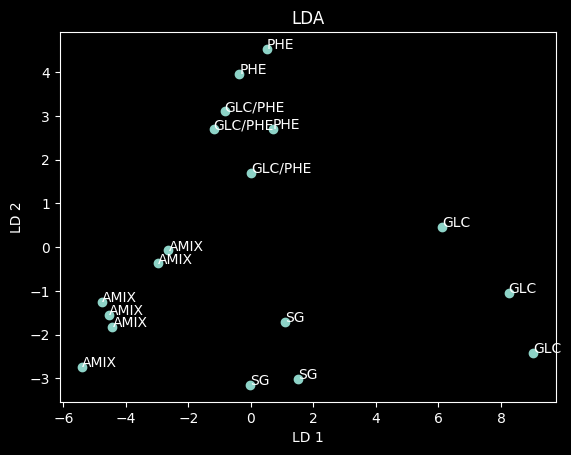

In [30]:
# plot the LDA results
plt.scatter(lda_df['LD 1'], lda_df['LD 2'])

# add labels to plot
for i, label in enumerate(lda_df['group_name']):
    plt.annotate(label, (lda_df['LD 1'][i], lda_df['LD 2'][i]))

plt.title('LDA')
plt.xlabel(f'LD 1')
plt.ylabel(f'LD 2')

### Run t-SNE

In [35]:
# define and run t-SNE
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

tsne_data = tsne.fit_transform(scaled_data)

tsne_data

array([[-36.345047 ,  -2.2619557],
       [-20.20159  ,  -6.8514967],
       [-30.173748 , -11.035681 ],
       [-38.935112 ,  71.26968  ],
       [-36.799435 ,  81.75853  ],
       [-26.395037 ,  73.487686 ],
       [  4.3067317,  57.858414 ],
       [ 17.277641 ,  57.090393 ],
       [ 22.192617 ,  47.76408  ],
       [ -6.686632 ,  41.32551  ],
       [  4.864478 ,  40.59176  ],
       [-10.635736 ,  30.826313 ],
       [ 38.962475 , -55.33868  ],
       [ 43.81697  , -46.33229  ],
       [ 29.454815 , -47.250324 ],
       [ 14.576434 , -16.184948 ],
       [ 33.628807 , -24.08137  ],
       [ 19.079054 , -24.994194 ]], dtype=float32)

In [36]:
# create a dataframe from the t-SNE output
tsne_df = pd.DataFrame(data=tsne_data, columns=['t-SNE 1', 't-SNE 2'])

tsne_df['group_name'] = group_names

tsne_df

,t-SNE 1,t-SNE 2,group_name
0,-36.345047,-2.261956,SG
1,-20.201590,-6.851497,SG
2,-30.173748,-11.035681,SG
3,-38.935112,71.269676,GLC
4,-36.799435,81.758530,GLC
5,-26.395037,73.487686,GLC
6,4.306732,57.858414,PHE
7,17.277641,57.090393,PHE
8,22.192617,47.764080,PHE
9,-6.686632,41.325508,GLC/PHE


Text(0, 0.5, 't-SNE 2')

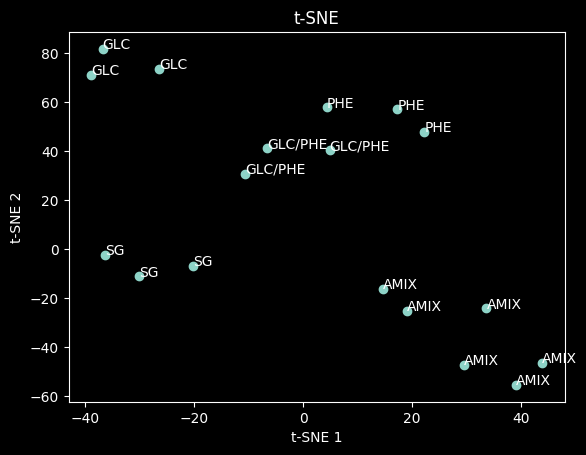

In [37]:
# plot the t-SNE results
plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'])

# add labels to plot
for i, label in enumerate(tsne_df['group_name']):
    plt.annotate(label, (tsne_df['t-SNE 1'][i], tsne_df['t-SNE 2'][i]))

plt.title('t-SNE')
plt.xlabel(f't-SNE 1')
plt.ylabel(f't-SNE 2')